In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [8]:
df = pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Total Chargers had some missing values so to convert blankes (Object) to 0(int) and  then  finally int to float type

In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

Checking for Null Values:

In [ ]:
df.isnull().sum()

np.int64(0)

Descriptive Analysis:

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Check for Duplicated

In [19]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Checking customerid again as customer id should be unique
df["customerID"].duplicated().sum()

np.int64(0)

In [21]:
def conv(value):
    if value ==1:
        return "yes"
    else:
        return "no"
    
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

In [25]:
# Converted 0 and 1 values of senior citizen to yes/No to make it easier to  understand
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

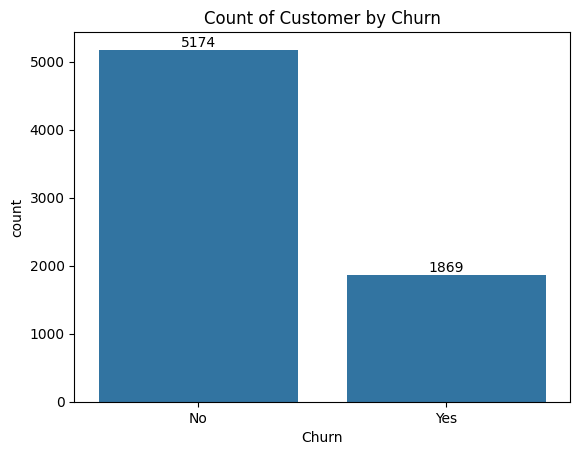

In [37]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])

plt.title("Count of Customer by Churn")
plt.show()

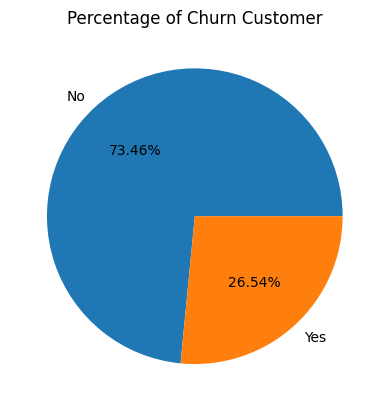

<Figure size 300x400 with 0 Axes>

In [39]:
gb = df.groupby("Churn").agg({'Churn':"count"})
gb

plt.pie(gb['Churn'], labels= gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churn Customer")
plt.figure(figsize=(3,4))

plt.show()

From the given pie chart we can conlcude that 26.54% of our Customer has Churned out.
Now Lets Expolore the reason behind that.

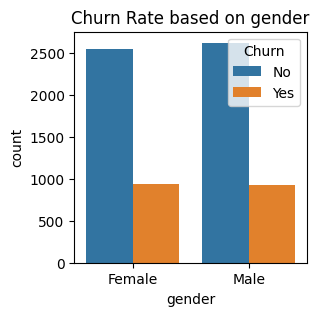

In [44]:
plt.figure(figsize=(3,3))
plt.title("Churn Rate based on gender")
sns.countplot(x = "gender" , data = df, hue = "Churn")
plt.show()

From the above graph it is clear, Gender has Nothing to do with Churn Rate as both the Gender has an Equal Churn Rate.

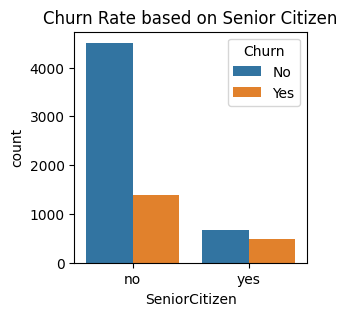

In [45]:
plt.figure(figsize=(3,3))
plt.title("Churn Rate based on Senior Citizen")
sns.countplot(x = "SeniorCitizen" , data = df, hue = "Churn")
plt.show()

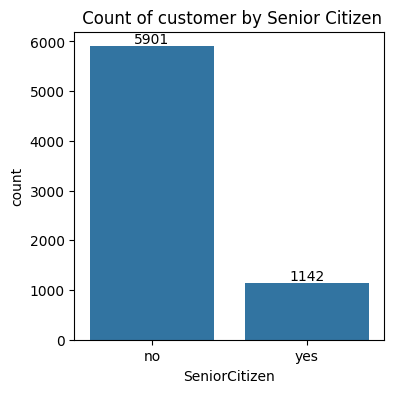

In [51]:
plt.figure(figsize=(4,4))
ac = sns.countplot(x = "SeniorCitizen" , data = df)
ac.bar_label(ac.containers[0])
plt.title(" Count of customer by Senior Citizen")
plt.show()

C:\Users\SauravPayal\AppData\Local\Temp\ipykernel_12104\2462148494.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = val if bottom is None else bottom[j] + val / 2


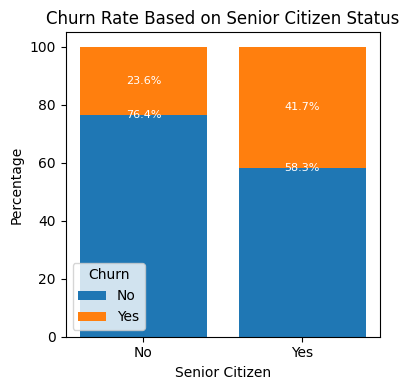

In [47]:
cross_tab = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Convert to percentages
percentages = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Step 3: Plot
fig, ax = plt.subplots(figsize=(4, 4))

bottom = None
colors = ['#1f77b4', '#ff7f0e']  # Example colors for 'No' and 'Yes'

for i, col in enumerate(percentages.columns):
    ax.bar(percentages.index,
           percentages[col],
           label=col,
           bottom=bottom,
           color=colors[i])
    # Add text labels
    for j, val in enumerate(percentages[col]):
        y = val if bottom is None else bottom[j] + val / 2
        ax.text(j, y, f'{val:.1f}%', ha='center', va='center', color='white', fontsize=8)
    bottom = percentages[col] if bottom is None else bottom + percentages[col]

# Formatting
ax.set_title("Churn Rate Based on Senior Citizen Status")
ax.set_xlabel("Senior Citizen")
ax.set_ylabel("Percentage")
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])
ax.legend(title='Churn')
plt.tight_layout()
plt.show()


Compartively a greater percentage of Senior Citizen have churned

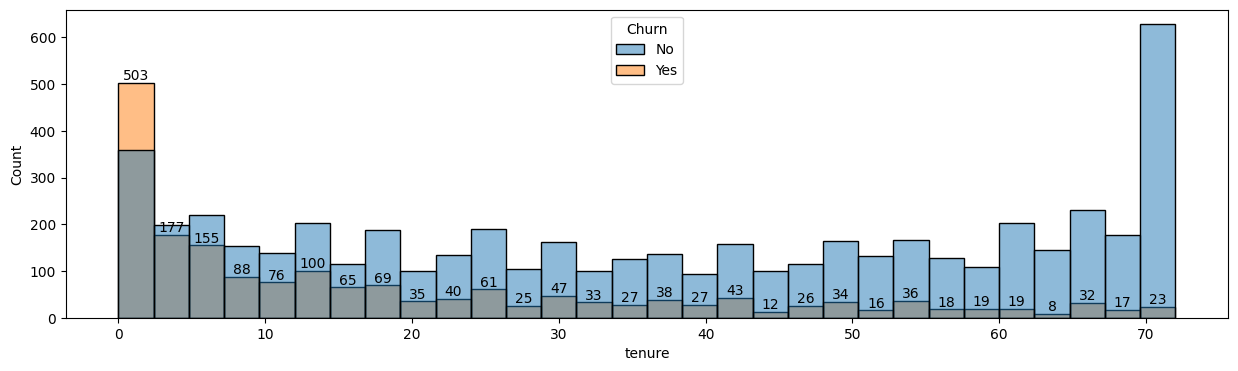

In [64]:
# Based on tenure

plt.figure(figsize= (15,4))
ax = sns.histplot( x = "tenure" , data = df , bins = 30, hue = "Churn")
ax.bar_label(ax.containers[0])

plt.show()

Highest churn Rate is in the First &  Second Month. Meaning People who have used our services fopr a long time have stayed and people who haved used our services for 1 or 2 months have churned.

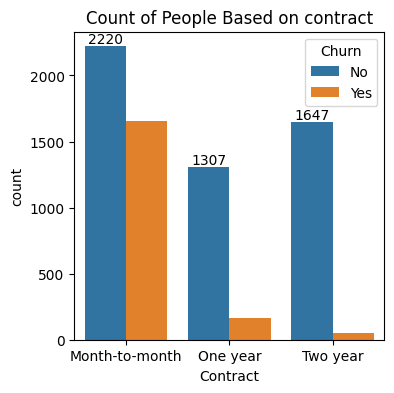

In [66]:
# Count of People based on Contract

plt.figure(figsize= (4,4))
plt.title("Count of People Based on contract")
ax = sns.countplot(x = "Contract" , data = df , hue = "Churn")
ax.bar_label(ax.containers[0])
plt.show()

People who have month to month contract are more likely to churn then from those eho have 1 or 2 years of contract.

In [67]:
df.columns.values 

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

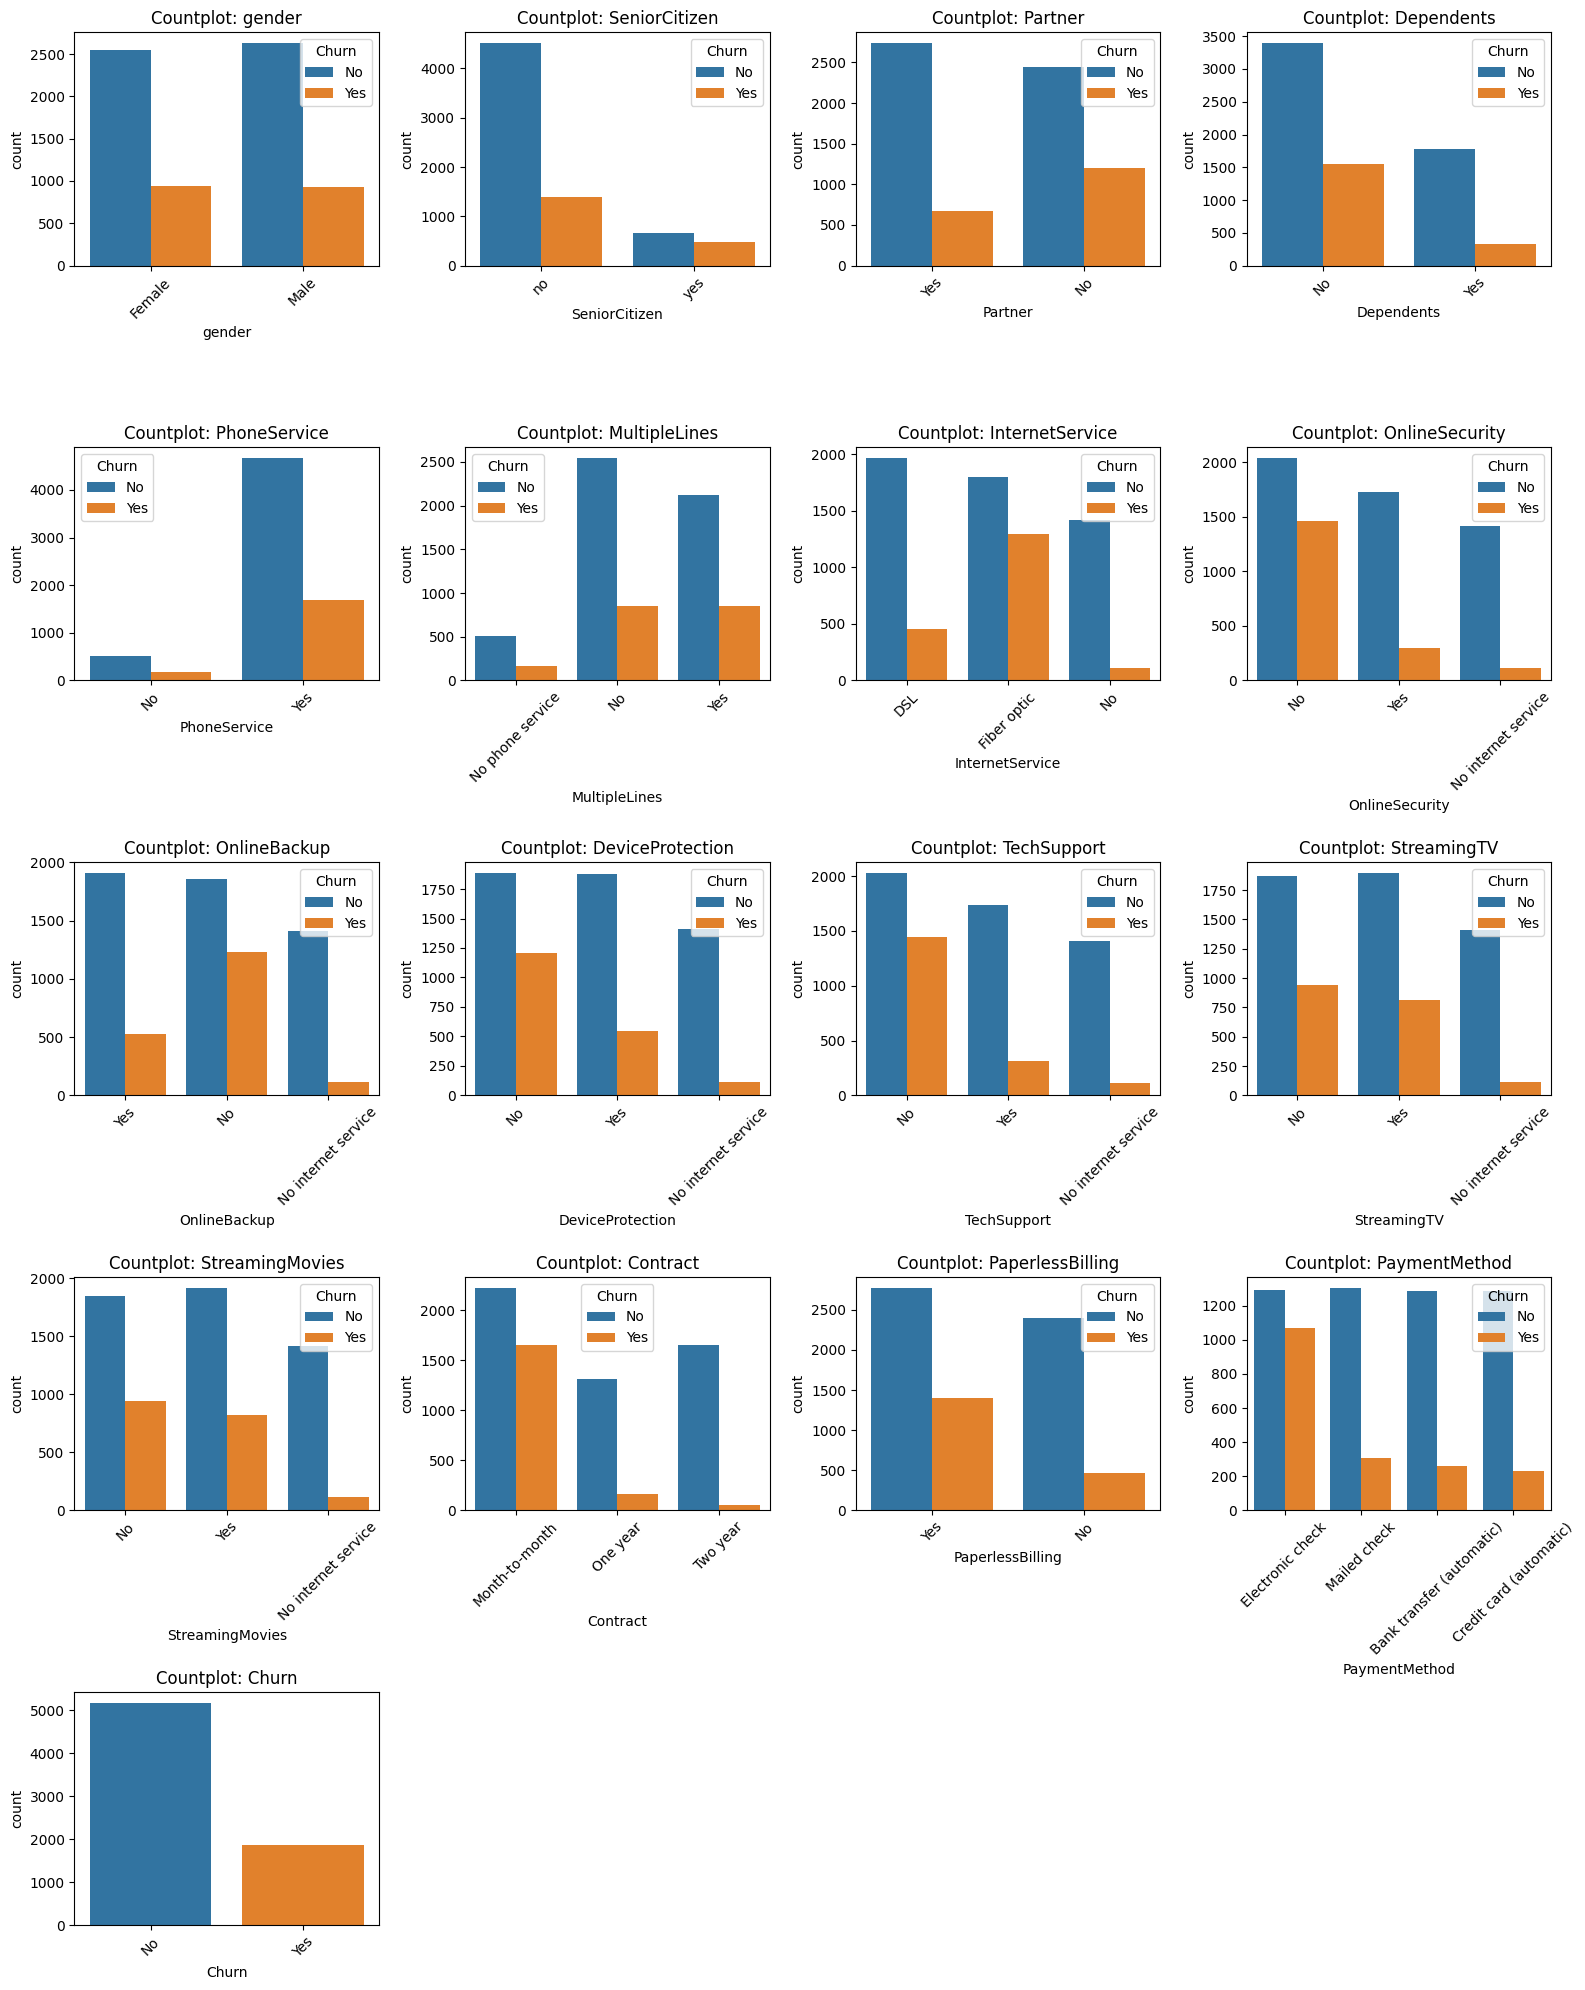

In [70]:
# Columns you want to plot (excluding non-categorical or irrelevant ones)
columns_to_plot = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Setup: define subplot grid size
n_cols = 4
n_rows = math.ceil(len(columns_to_plot) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))
axes = axes.flatten()  # Make it easy to iterate

# Create countplots
for i, col in enumerate(columns_to_plot):
    sns.countplot(x=col, data=df, ax=axes[i], hue = "Churn")
    axes[i].set_title(f'Countplot: {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused axes
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

From the Above Sub Plots , we can conclude:

No Dependents or Partner → Higher churn.

Paperless Billing = Yes → More likely to churn.

Fiber optic users churn more than DSL or those with no internet.

Customers with No Phone Service have the lowest churn.

Electronic check users have the highest churn among payment methods.

StreamingTV and StreamingMovies = Yes → Slightly higher churn.

MultipleLines = Yes → Slight increase in churn.

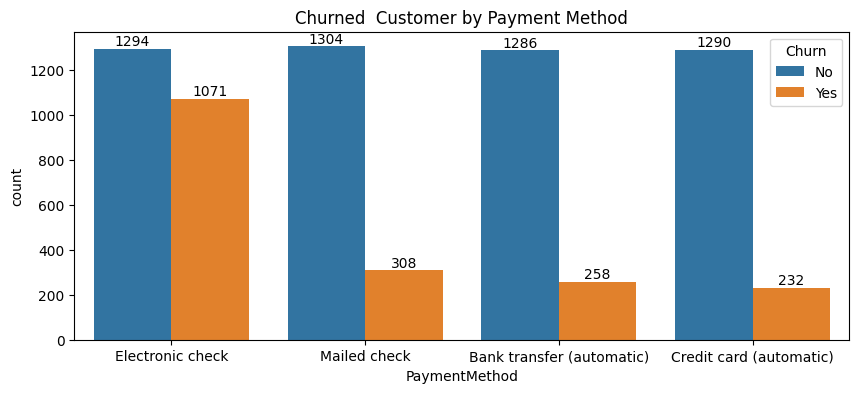

In [74]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x = "PaymentMethod" , data = df , hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned  Customer by Payment Method")
plt.show()

From the Above chart  we can see Customers with Electronic Check are more likely to churn and Customer with Automatic payment mode are less like to Churn
